## Reference file:
- https://vincent.codes.finance/posts/edgartools/
- https://pypi.org/project/edgartools/

## Edgar company search:
- https://www.sec.gov/edgar/searchedgar/companysearch
- Example search resuly: https://www.sec.gov/edgar/browse/?CIK=320193&owner=exclude
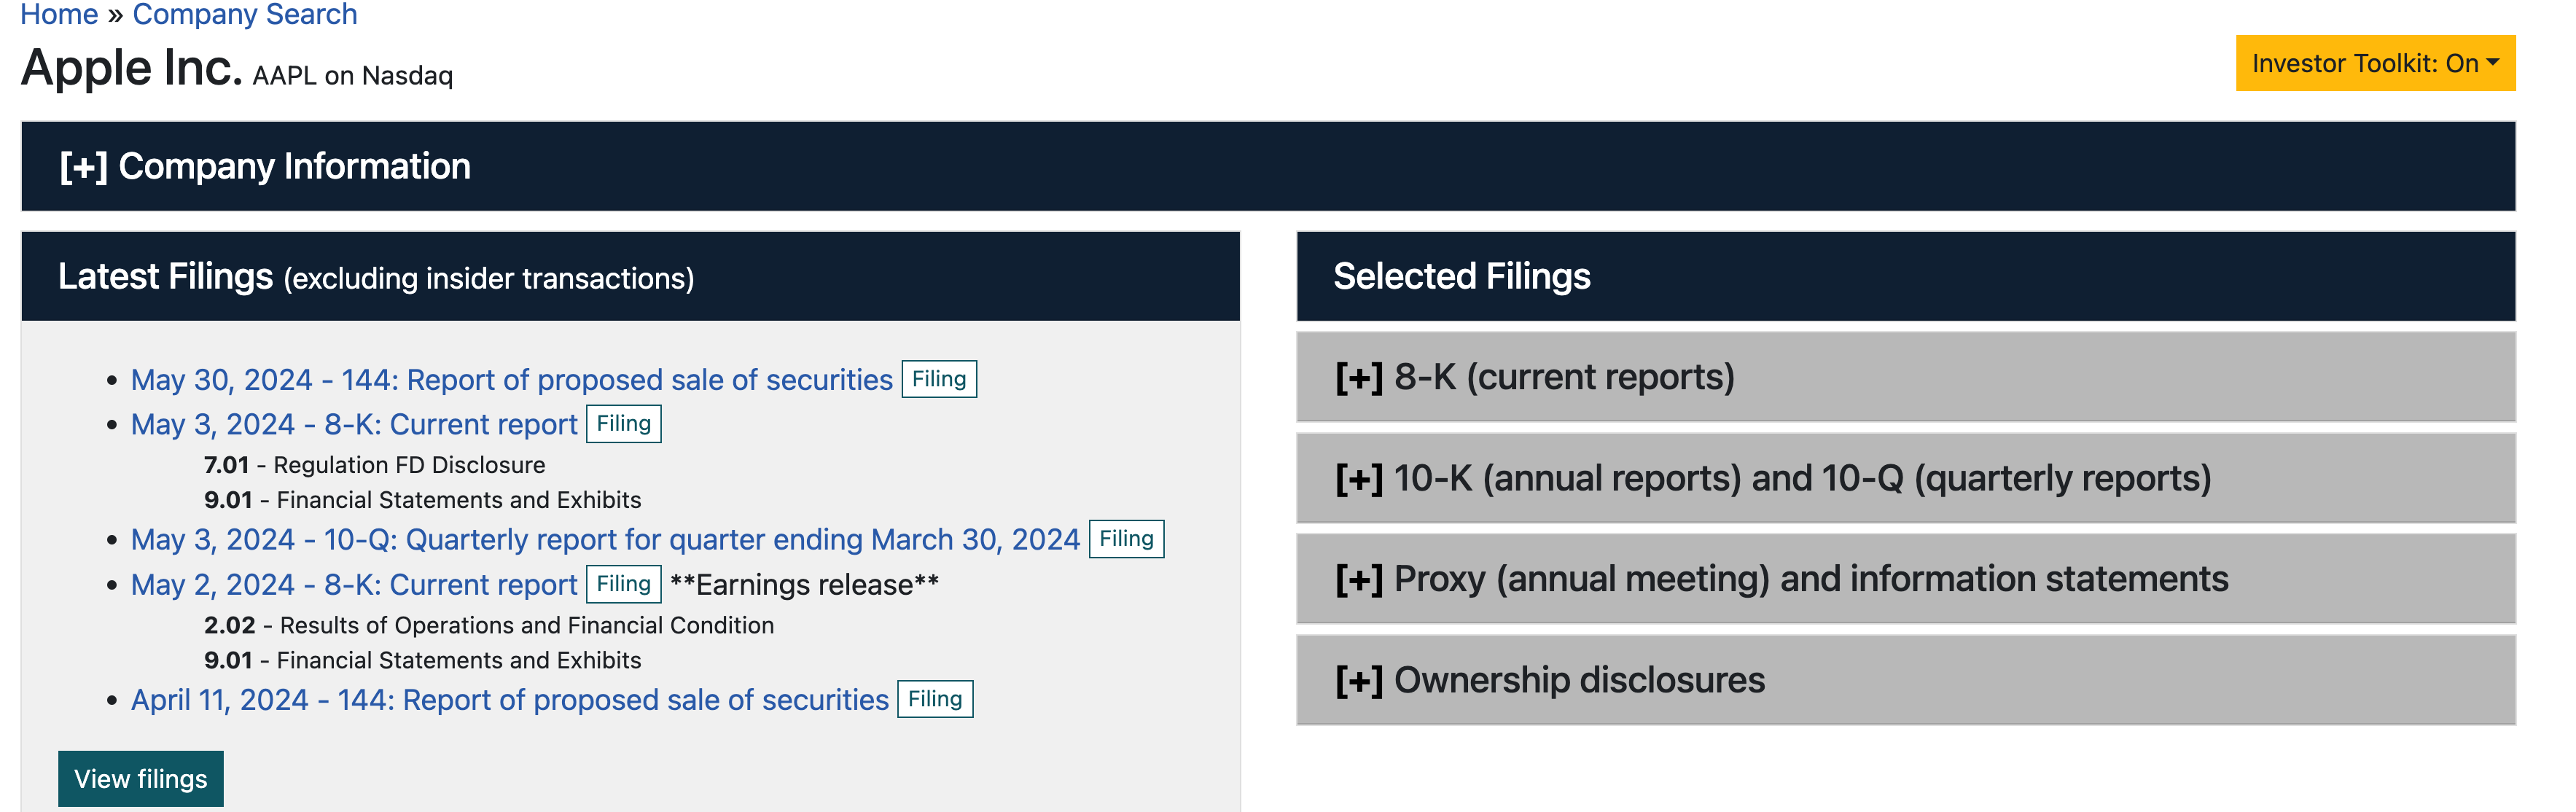

## Types of reports
- Form 10-K
The Form 10-K is an annual report that publicly traded companies must file with the SEC. This report provides a comprehensive overview of the company's business and financial condition and includes audited financial statements. The 10-K is more detailed than the annual report sent to shareholders. It includes information on the company’s history, organizational structure, executive compensation, equity, subsidiaries, and audited financial statements, among other details.

- Form 10-Q
The Form 10-Q is a quarterly report companies listed on stock exchanges must file with the SEC. Unlike the 10-K, the financial statements in the 10-Q are not required to be audited. The 10-Q provides a continuous view of the company’s financial position during the year. It includes unaudited financial statements and provides a continuing view of a company's financial position throughout the year.

- Form 8-K
The Form 8-K is known as a "current report" and is used by publicly traded companies to disclose any material events that shareholders should know about, including acquisitions, bankruptcy, the resignation of directors, or changes in the fiscal year and more. This report helps keep the public informed of events that may affect its decisions on that company's stock. Companies must file this report within four business days of the event.

## Basic Usage

In [1]:
from edgar import set_identity

set_identity("ucabkk1@ucl.ac.uk")

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup

[16:58:33] INFO     Identity of the Edgar REST client set to [ucabkk1@ucl.ac.uk]                        core.py:148

In [2]:
from edgar import Company

apple = Company("AAPL")
apple

╭─────────────────────────────────────────────── Apple Inc. (AAPL) ───────────────────────────────────────────────╮
│                                                                                                                 │
│   CIK      Category                  Industry               Incorporated                                        │
│  ────────────────────────────────────────────────────────────────────────                                       │
│   320193   Large accelerated filer   Electronic Computers   California                                          │
│                                                                                                                 │
│ ╭───────── ✉ Mailing Address ──────────╮                 ╭──────── 🏢 Business Address ─────────╮               │
│ │ ONE APPLE PARK WAY                   │                 │ ONE APPLE PARK WAY                   │               │
│ │ CUPERTINO, CA 95014                  │                 │ CUPERTINO, C

In [3]:
# Check all the attribute that the company has:
print(dir(apple))

# to_dict attribute will contains all essential information about the company
apple.to_dict()


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rich__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_unicode_symbol', 'business_address', 'category', 'cik', 'description', 'display_name', 'ein', 'entity_type', 'exchanges', 'filings', 'financials', 'fiscal_year_end', 'flags', 'for_cik', 'for_ticker', 'former_names', 'get_facts', 'get_filings', 'industry', 'insider_transaction_for_issuer_exists', 'insider_transaction_for_owner_exists', 'investor_website', 'is_company', 'is_individual', 'mailing_address', 'name', 'phone', 'sic', 'sic_description', 'state_of_incorporation', 'state_of_incorporation_description', 'summary', 'ticker_display', 'ticker_info', 'tickers', 'to_dict', 'website']


{'cik': 320193,
 'name': 'Apple Inc.',
 'display_name': 'Apple Inc.',
 'is_company': True,
 'tickers': ['AAPL'],
 'exchanges': ['Nasdaq'],
 'sic': '3571',
 'industry': 'Electronic Computers',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '0928',
 'entity_type': 'operating',
 'phone': '(408) 996-1010',
 'flags': '',
 'mailing_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'business_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'insider_transaction_for_owner_exists': False,
 'insider_transaction_for_issuer_exists': True,
 'ein': '942404110',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'CA',
 'state_of_incorporation_description': 'CA',
 'former_names': [{'name': 'APPLE INC',
   'from': '

In [4]:
apple.to_dict()

{'cik': 320193,
 'name': 'Apple Inc.',
 'display_name': 'Apple Inc.',
 'is_company': True,
 'tickers': ['AAPL'],
 'exchanges': ['Nasdaq'],
 'sic': '3571',
 'industry': 'Electronic Computers',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '0928',
 'entity_type': 'operating',
 'phone': '(408) 996-1010',
 'flags': '',
 'mailing_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'business_address': {'street1': 'ONE APPLE PARK WAY',
  'street2': None,
  'city': 'CUPERTINO',
  'state_or_country': 'CA',
  'zipcode': '95014',
  'state_or_country_desc': 'CA'},
 'insider_transaction_for_owner_exists': False,
 'insider_transaction_for_issuer_exists': True,
 'ein': '942404110',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'CA',
 'state_of_incorporation_description': 'CA',
 'former_names': [{'name': 'APPLE INC',
   'from': '

In [5]:
company_facts = apple.get_facts()

company_facts.to_pandas()

,namespace,fact,val,accn,end,fy,fp,form,filed,frame,start
0,dei,EntityCommonStockSharesOutstanding,8.958168e+08,0001193125-09-153165,2009-06-27,2009,Q3,10-Q,2009-07-22,CY2009Q2I,None
1,dei,EntityCommonStockSharesOutstanding,9.006785e+08,0001193125-09-214859,2009-10-16,2009,FY,10-K,2009-10-27,None,None
2,dei,EntityCommonStockSharesOutstanding,9.006785e+08,0001193125-10-012091,2009-10-16,2009,FY,10-K/A,2010-01-25,CY2009Q3I,None
3,dei,EntityCommonStockSharesOutstanding,9.067946e+08,0001193125-10-012085,2010-01-15,2010,Q1,10-Q,2010-01-25,CY2009Q4I,None
4,dei,EntityCommonStockSharesOutstanding,9.099384e+08,0001193125-10-088957,2010-04-09,2010,Q2,10-Q,2010-04-21,CY2010Q1I,None
...,...,...,...,...,...,...,...,...,...,...,...
22572,us-gaap,IncrementalCommonSharesAttributableToShareBase...,6.687800e+07,0000320193-24-000006,2023-12-30,2024,Q1,10-Q,2024-02-02,CY2023Q4,2023-10-01
22573,us-gaap,IncrementalCommonSharesAttributableToShareBase...,6.286500e+07,0000320193-24-000069,2024-03-30,2024,Q2,10-Q,2024-05-03,None,2023-10-01
22574,us-gaap,IncrementalCommonSharesAttributableToShareBase...,5.885300e+07,0000320193-24-000069,2024-03-30,2024,Q2,10-Q,2024-05-03,CY2024Q1,2023-12-31
22575,us-gaap,OtherAssetsMiscellaneousNoncurrent,3.905300e+10,0000320193-23-000106,2022-09-24,2023,FY,10-K,2023-11-03,CY2022Q3I,None


Important: The financial data is taken from fiancial section in the latest 10K report.

To inspect the details of the financial information, there are several attributes to look for including 'balance_sheet', 'cash_flow_statement', 'income_Statement' and etc. You can call the to_dataframe function to convert to dataframe.

In [6]:
# Inspect methods and attributes of the financials object
print(dir(apple.financials))
apple.financials

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rich__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'balance_sheet', 'cash_flow_statement', 'from_xbrl', 'income_statement']


                                                                                                                   
                                     Balance Sheet                                                                 
                                                                                                                   
                                                      2023-09-30         2022-09-24                                
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   29,965,000,000     23,646,000,000                                
      Marketable Securities                       31,590,000,000     24,

In [7]:
apple.financials.balance_sheet.to_dataframe()

,Label,2023-09-30,2022-09-24
Fact,,,
CashAndCashEquivalentsAtCarryingValue,Cash and Cash Equivalents,29965000000,23646000000
MarketableSecuritiesCurrent,Marketable Securities,31590000000,24658000000
AccountsReceivableNetCurrent,"Accounts Receivable, net",29508000000,28184000000
NontradeReceivablesCurrent,Vendor non-trade Receivables,31477000000,32748000000
InventoryNet,Inventories,6331000000,4946000000
OtherAssetsCurrent,Other Current Assets,14695000000,21223000000
AssetsCurrent,Total Current Assets,143566000000,135405000000
PropertyPlantAndEquipmentNet,"Property and Equipment, net",43715000000,42117000000
IntangibleAssetsNet,"Intangible Assets, net",<NA>,<NA>


In [8]:
apple.former_names


[{'name': 'APPLE INC',
  'from': '2007-01-10T00:00:00.000Z',
  'to': '2019-08-05T00:00:00.000Z'},
 {'name': 'APPLE COMPUTER INC',
  'from': '1994-01-26T00:00:00.000Z',
  'to': '2007-01-04T00:00:00.000Z'},
 {'name': 'APPLE COMPUTER INC/ FA',
  'from': '1997-07-28T00:00:00.000Z',
  'to': '1997-07-28T00:00:00.000Z'}]

## Company Filings

Documentation: https://dgunning.github.io/edgartools/using-the-filings-api/

Commands to get different filings:
> filings = get_filings(2021) # Get filings for 2021

> filings = get_filings(2021, 4) # Get filings for 2021 Q4

> filings = get_filings(2021, [3,4]) # Get filings for 2021 Q3 and Q4

> filings = get_filings([2020, 2021]) # Get filings for 2020 and 2021

etc.


In [9]:
filings = apple.get_filings(form="10-Q")
filings

╭──────────────────────────────────────── Filings for Apple Inc. [320193] ────────────────────────────────────────╮
│                                                                                                                 │
│        form   filed        accession_number       xbrl                                                          │
│  ──────────────────────────────────────────────────────                                                         │
│   0    10-Q   2024-05-03   0000320193-24-000069   ✓                                                             │
│   1    10-Q   2024-02-02   0000320193-24-000006   ✓                                                             │
│   2    10-Q   2023-08-04   0000320193-23-000077   ✓                                                             │
│   3    10-Q   2023-05-05   0000320193-23-000064   ✓                                                             │
│   4    10-Q   2023-02-03   0000320193-23-000006   ✓                   

In [10]:
filings.to_pandas()

,accession_number,filing_date,reportDate,acceptanceDateTime,act,form,fileNumber,items,size,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription
0,0000320193-24-000069,2024-05-03,2024-03-30,2024-05-02T18:04:25.000Z,34,10-Q,001-36743,,5284139,1,1,aapl-20240330.htm,10-Q
1,0000320193-24-000006,2024-02-02,2023-12-30,2024-02-01T18:03:38.000Z,34,10-Q,001-36743,,4984121,1,1,aapl-20231230.htm,10-Q
2,0000320193-23-000077,2023-08-04,2023-07-01,2023-08-03T18:04:43.000Z,34,10-Q,001-36743,,5939898,1,1,aapl-20230701.htm,10-Q
3,0000320193-23-000064,2023-05-05,2023-04-01,2023-05-04T18:03:52.000Z,34,10-Q,001-36743,,6314786,1,1,aapl-20230401.htm,10-Q
4,0000320193-23-000006,2023-02-03,2022-12-31,2023-02-02T18:01:30.000Z,34,10-Q,001-36743,,5915088,1,1,aapl-20221231.htm,10-Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0000320193-95-000011,1995-08-11,1995-06-30,1995-08-11T00:00:00.000Z,,10-Q,000-10030,,213500,0,0,,
87,0000320193-95-000008,1995-05-15,1995-03-31,1995-05-15T00:00:00.000Z,,10-Q,000-10030,,111162,0,0,,
88,0000320193-95-000003,1995-02-09,1994-12-30,1995-02-09T00:00:00.000Z,,10-Q,000-10030,,132577,0,0,,
89,0000320193-94-000013,1994-08-12,1994-07-01,1994-08-12T00:00:00.000Z,,10-Q,000-10030,,138354,0,0,,


### Accessing Filling Data
Beyond metadata, edgartools facilitates downloading and accessing the content of filings. Let’s work with the latest filing from the list we retrieved earlier.

In [11]:
latest_10q = filings.latest()
latest_10q

╭────────────────────────────────────────── Apple Inc. [320193] 10-Q 📊 ──────────────────────────────────────────╮
│ ╭──────────────────────┬────────────╮                                                                           │
│ │ 0000320193-24-000069 │ 2024-05-03 │                                                                           │
│ ╰──────────────────────┴────────────╯                                                                           │
│ ╭───────────────────────────────────────────────────────────────────────────────────────────╮                   │
│ │ Links: 🏠 Homepage 📄 Primary Document 📜 Full Submission Text                            │                   │
│ ├───────────────────────────────────────────────────────────────────────────────────────────┤                   │
│ │ 🏠 https://sec.gov/Archives/edgar/data/320193/0000320193-24-000069-index.html             │                   │
│ │ 📄 https://sec.gov/Archives/edgar/data/320193/000032019324000069/aapl-2024

In [12]:
latest_10q.view()

aapl-20240330



UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549


FORM 10-Q


(Mark One)
☒ QUARTERLY REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the quarterly period ended March 30, 2024
or
☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934
For the transition period from              to             .
Commission File Number: 001-36743


Apple Inc.
(Exact name of Registrant as specified in its charter)



California | 94-2404110 
(State or other jurisdictionof incorporation or organization) | (I.R.S. Employer Identification No.)
One Apple Park Way | 
Cupertino, California | 95014 
(Address of principal executive offices) | (Zip Code) 

(408) 996-1010
(Registrant’s telephone number, including area code)


Securities registered pursuant to Section 12(b) of the Act:

Title of each class | Trading symbol(s) | Name of each exchange on which registered
Common Stock, $0.00001 par value per sha

To download the filing content, you can use the obj() method, which in this case will return a TenQ object. This object contains the filing’s content.

According to https://www.sec.gov/Archives/edgar/data/320193/000032019324000069/aapl-20240330.htm#idaed8f90d5814c63940b866deda643e7_115

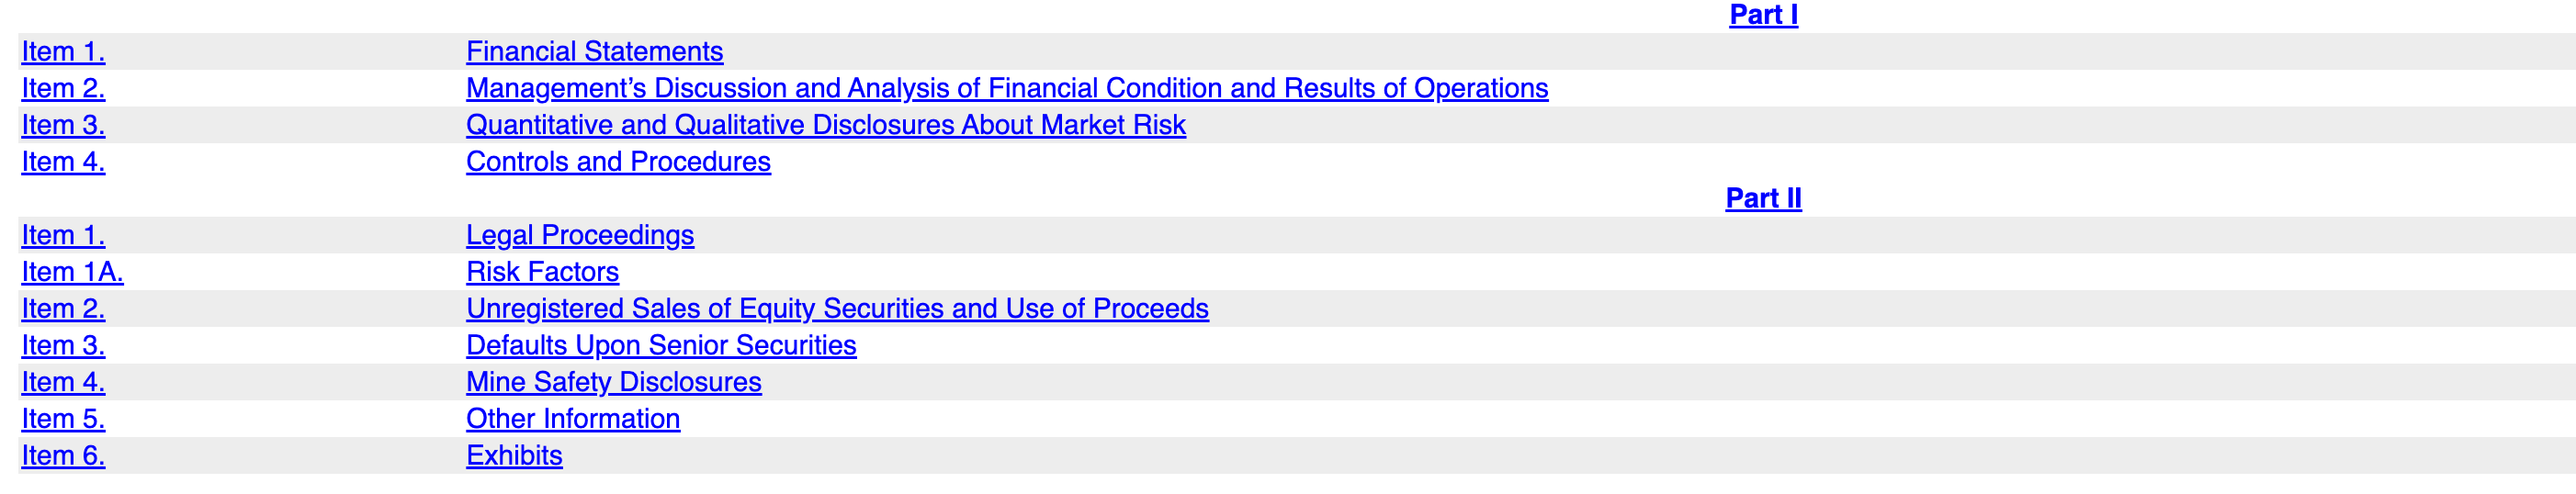

Note: Item 1 can access both financial statements and legal proceedings.

In [13]:
tenq = latest_10q.obj()
print(tenq.items)
print(tenq['Item 1'])

['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 1A', 'Item 5', 'Item 6']
Item 1.    Financial Statements
Apple Inc.
CONDENSED CONSOLIDATED STATEMENTS OF OPERATIONS (Unaudited)
(In millions, except number of shares, which are reflected in thousands, and per-share amounts)

 | Three Months Ended | | Six Months Ended
 | March 30,2024 | | April 1,2023 | | March 30,2024 | | April 1,2023
Net sales: | | | | | | | 
Products | $ | 66,886 | | | $ | 73,929 | | $ | 163,344 | $ | 170,317
Services | 23,867 | | | 20,907 | | | 46,984 | | 41,673 
Total net sales | 90,753 | | | 94,836 | | | 210,328 | | 211,990 
Cost of sales: | | | | | | | 
Products | 42,424 | | | 46,795 | | | 100,864 | | 107,560 
Services | 6,058 | | | 6,065 | | | 12,338 | | 12,122 
Total cost of sales | 48,482 | | | 52,860 | | | 113,202 | | 119,682 
Gross margin | 42,271 | | | 41,976 | | | 97,126 | | 92,308 
Operating expenses: | | | | | | | 
Research and development | 7,903 | | | 7,457 | | | 15,599 | | 15,166 
Selling, general and adm

In [31]:
# Instead of accessing each item 1 of the tenq report to get the financials, you can also just use tenq.financials
tenq.financials

                                                                                                                   
                           Balance Sheet                                                                           
                                                                                                                   
                                                      2024-03-30                                                   
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                                                  
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   32,695,000,000                                                   
      Marketable Securities                       34,455,000,000        

In [35]:
tenq.financials.balance_sheet.to_dataframe().head()

,Label,2024-03-30
Fact,,
CashAndCashEquivalentsAtCarryingValue,Cash and Cash Equivalents,32695000000
MarketableSecuritiesCurrent,Marketable Securities,34455000000
AccountsReceivableNetCurrent,"Accounts Receivable, net",21837000000
NontradeReceivablesCurrent,Vendor non-trade Receivables,19313000000
InventoryNet,Inventories,6232000000


## Explore more companies

In [14]:

# import modules
import requests
import pandas as pd

# create request header
headers = {'User-Agent': "ucabkk1@ucl.ac.uk"}

# get all companies data
companyTickers = requests.get(
    "https://www.sec.gov/files/company_tickers.json",
    headers=headers
    )

# review response / keys
print(companyTickers.json())
# dictionary to dataframe
companyData = pd.DataFrame.from_dict(companyTickers.json(),
                                     orient='index')

# # add leading zeros to CIK
# companyData['cik_str'] = companyData['cik_str'].astype(
#                            str).str.zfill(10)

companyData.head()

{'0': {'cik_str': 789019, 'ticker': 'MSFT', 'title': 'MICROSOFT CORP'}, '1': {'cik_str': 320193, 'ticker': 'AAPL', 'title': 'Apple Inc.'}, '2': {'cik_str': 1045810, 'ticker': 'NVDA', 'title': 'NVIDIA CORP'}, '3': {'cik_str': 1652044, 'ticker': 'GOOGL', 'title': 'Alphabet Inc.'}, '4': {'cik_str': 1018724, 'ticker': 'AMZN', 'title': 'AMAZON COM INC'}, '5': {'cik_str': 1326801, 'ticker': 'META', 'title': 'Meta Platforms, Inc.'}, '6': {'cik_str': 1067983, 'ticker': 'BRK-B', 'title': 'BERKSHIRE HATHAWAY INC'}, '7': {'cik_str': 1046179, 'ticker': 'TSM', 'title': 'TAIWAN SEMICONDUCTOR MANUFACTURING CO LTD'}, '8': {'cik_str': 59478, 'ticker': 'LLY', 'title': 'ELI LILLY & Co'}, '9': {'cik_str': 353278, 'ticker': 'NVO', 'title': 'NOVO NORDISK A S'}, '10': {'cik_str': 1730168, 'ticker': 'AVGO', 'title': 'Broadcom Inc.'}, '11': {'cik_str': 19617, 'ticker': 'JPM', 'title': 'JPMORGAN CHASE & CO'}, '12': {'cik_str': 1318605, 'ticker': 'TSLA', 'title': 'Tesla, Inc.'}, '13': {'cik_str': 1403161, 'ticke

,cik_str,ticker,title
0,789019,MSFT,MICROSOFT CORP
1,320193,AAPL,Apple Inc.
2,1045810,NVDA,NVIDIA CORP
3,1652044,GOOGL,Alphabet Inc.
4,1018724,AMZN,AMAZON COM INC


In [15]:
company = Company("789019")
company.to_dict()

{'cik': 789019,
 'name': 'MICROSOFT CORP',
 'display_name': 'MICROSOFT CORP',
 'is_company': True,
 'tickers': ['MSFT'],
 'exchanges': ['Nasdaq'],
 'sic': '7372',
 'industry': 'Services-Prepackaged Software',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '0630',
 'entity_type': 'operating',
 'phone': '425-882-8080',
 'flags': '',
 'mailing_address': {'street1': 'ONE MICROSOFT WAY',
  'street2': None,
  'city': 'REDMOND',
  'state_or_country': 'WA',
  'zipcode': '98052-6399',
  'state_or_country_desc': 'WA'},
 'business_address': {'street1': 'ONE MICROSOFT WAY',
  'street2': None,
  'city': 'REDMOND',
  'state_or_country': 'WA',
  'zipcode': '98052-6399',
  'state_or_country_desc': 'WA'},
 'insider_transaction_for_owner_exists': True,
 'insider_transaction_for_issuer_exists': True,
 'ein': '911144442',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'WA',
 'state_of_incorporation_description': 'WA',
 'former_names': []}

In [16]:
from neo4j_utility import *

select_company = companyData.iloc[:5]


# dict_to_cypher_create_node(apple.to_dict(), 'company')

In [17]:
for cik in list(select_company['cik_str']):
    company_info, _ = get_company_info_from_cik(cik)
    print(dict_to_cypher_create_node(company_info, 'Company'))
    

CREATE (:Company {cik: 789019, name: 'MICROSOFT CORP', display_name: 'MICROSOFT CORP', is_company: true, tickers: '["MSFT"]', exchanges: '["Nasdaq"]', sic: '7372', industry: 'Services-Prepackaged Software', category: 'Large accelerated filer', fiscal_year_end: '0630', entity_type: 'operating', phone: '425-882-8080', flags: '', mailing_address: '{"street1": "ONE MICROSOFT WAY", "street2": null, "city": "REDMOND", "state_or_country": "WA", "zipcode": "98052-6399", "state_or_country_desc": "WA"}', business_address: '{"street1": "ONE MICROSOFT WAY", "street2": null, "city": "REDMOND", "state_or_country": "WA", "zipcode": "98052-6399", "state_or_country_desc": "WA"}', insider_transaction_for_owner_exists: true, insider_transaction_for_issuer_exists: true, ein: '911144442', description: '', website: '', investor_website: '', state_of_incorporation: 'WA', state_of_incorporation_description: 'WA', former_names: '[]'})
CREATE (:Company {cik: 320193, name: 'Apple Inc.', display_name: 'Apple Inc.

In [21]:
company_info, company = get_company_info_from_cik('1652044')
company_info

{'cik': 1652044,
 'name': 'Alphabet Inc.',
 'display_name': 'Alphabet Inc.',
 'is_company': True,
 'tickers': ['GOOGL', 'GOOG'],
 'exchanges': ['Nasdaq', 'Nasdaq'],
 'sic': '7370',
 'industry': 'Services-Computer Programming, Data Processing, Etc.',
 'category': 'Large accelerated filer',
 'fiscal_year_end': '1231',
 'entity_type': 'operating',
 'phone': '650-253-0000',
 'flags': '',
 'mailing_address': {'street1': '1600 AMPHITHEATRE PARKWAY',
  'street2': None,
  'city': 'MOUNTAIN VIEW',
  'state_or_country': 'CA',
  'zipcode': '94043',
  'state_or_country_desc': 'CA'},
 'business_address': {'street1': '1600 AMPHITHEATRE PARKWAY',
  'street2': None,
  'city': 'MOUNTAIN VIEW',
  'state_or_country': 'CA',
  'zipcode': '94043',
  'state_or_country_desc': 'CA'},
 'insider_transaction_for_owner_exists': True,
 'insider_transaction_for_issuer_exists': True,
 'ein': '611767919',
 'description': '',
 'website': '',
 'investor_website': '',
 'state_of_incorporation': 'DE',
 'state_of_incorpora

In [22]:
company.financials

                                                                                                                   
                                     Balance Sheet                                                                 
                                                                                                                   
                                                      2023-12-31         2022-12-31                                
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━                               
    ASSETS:                                                                                                        
    CURRENT ASSETS:                                                                                                
      Cash and Cash Equivalents                   24,048,000,000     21,879,000,000                                
      Marketable Securities                       86,868,000,000     91,